In [1]:
import math
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation

%matplotlib inline

**Wave propagation calculation**

25


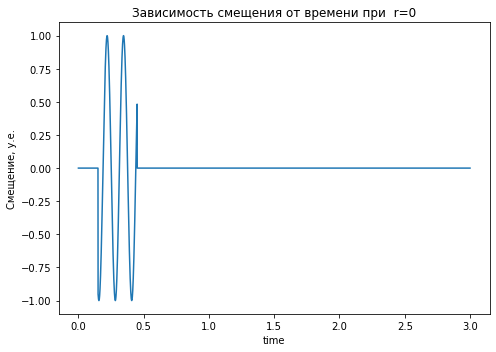

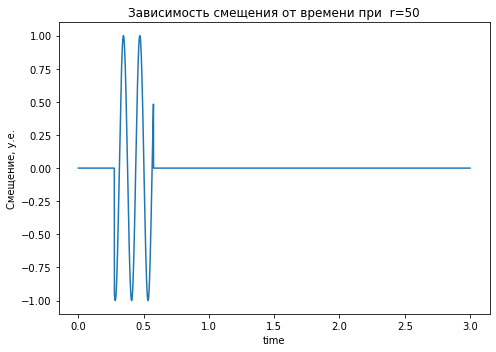

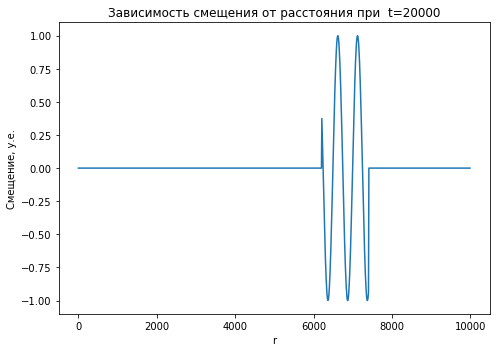

In [20]:

def create_source_wave(arr_u, delta_t, dim_t, f):
    for t in range(int(dim_t*0.05), int(dim_t*0.15), 1):
        arr_u[0][t] = -math.sin(f*arr_t[t])
    return arr_u

    


delta_r = 10;
delta_t = 0.0001;

t_max=3;
r_max=10000;

dim_t=int(t_max/delta_t);
dim_r=int(r_max/delta_r);

# создадаем время и координаты
arr_t = np.arange(start=0, stop=t_max, step=delta_t)
arr_r = np.arange(start=0, stop=r_max, step=delta_r)


# создадим arr_u
arr_u = np.zeros((dim_r, dim_t))

# создание короткого испульса, при x = 0, в момент t = t0, длительностью dt
arr_u = create_source_wave(arr_u, delta_t, dim_t, f=50)

# plt.plot(arr_t, arr_u[0])
# plt.xlabel("time")
# plt.ylabel("Интенсивность созданного импульса")
# plt.title("Импульс, который был создан в координате x = 0");


def calc_wave_propagation(arr_u, dim_t, dim_r, delta_t, delta_r, intensity, velocity):    

    nn=int(delta_r/(delta_t*velocity));
    shift = 1
    print(nn)
    
    for r_index in range(1, dim_r-1, 1):
      for time_index in range(0, dim_t-1, 1):
        arr_u[r_index][time_index] = 0
        if(time_index > r_index*nn):
          if(time_index - r_index*nn < dim_t-1):
       #     print(time_index)
            arr_u[r_index][time_index] = intensity*arr_u[r_index - 1][time_index - nn]
    return arr_u

def plot_rslice(arr_u, r_i, arr_t=arr_t):
    arr2plot = np.zeros((dim_t))
    plt.figure(figsize=(7, 5))
    for time_index in range(0, dim_t-1, 1):
      arr2plot[time_index]=arr_u[r_i][time_index]
    
    plt.plot(arr_t, arr2plot)
    plt.xlabel("time")
    plt.ylabel("Смещение, у.е.")
    plt.title("Зависимость смещения от времени при  r={}".format(r_i))


def plot_tslice(arr_u, t_i, arr_r=arr_r):
    arr2plot = np.zeros((dim_r)) 
    plt.figure(figsize=(7, 5))
    for r_index in range(0, dim_r-1, 1):
      arr2plot[r_index]=arr_u[r_index][t_i]
    plt.plot(arr_r, arr2plot)
    plt.xlabel("r")
    plt.ylabel("Смещение, у.е.")
    plt.title("Зависимость смещения от расстояния при  t={}".format(t_i))
    
# просичтываем рапространение имупульсов
arr_u = calc_wave_propagation(arr_u, dim_t, dim_r, delta_t, delta_r, intensity=1, velocity=4000)

plot_rslice(arr_u, r_i=0)
plot_rslice(arr_u, r_i=50)
plot_tslice(arr_u, t_i=20000)

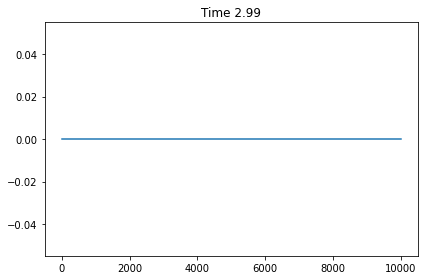

In [41]:
from matplotlib.animation import FuncAnimation
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
arr2plot = np.zeros((dim_r))
for r_index in range(0, dim_r-1, 1):
      arr2plot[r_index]=arr_u[r_index][0]
line, = ax.plot(arr_r, arr2plot);


def animate(i, arr_u, arr_t):
  for r_index in range(0, dim_r-1, 1):
      arr2plot[r_index]=arr_u[r_index][i]
  
  line.set_ydata(arr2plot)  # update the data.
  
  # print(i)
  # print(arr_u[700][20000])
  # print(arr_t[20000])
  plt.title('Time ' + str(arr_t[i]))
  
  return line,

fr = np.arange(start=0, stop=dim_t-1, step=100)

ani = FuncAnimation(fig, animate, frames=fr, fargs=(arr_u, arr_t), interval=10, repeat=False, blit=True,  cache_frame_data=False)
#ani = FuncAnimation(fig, animate, fargs=(arr_u, arr_t))
# To save the animation, use e.g.
#
ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)
# animate(10000, arr_u, arr_t)
plt.show()